## 4. Поиск мотива для каждого кластера. 

**Оценка расстояния для алгоритма KMS по Dunn-индексу**

На предыдущих шагах показано, что разделение на 2 кластера является оптимальным. 
Теперь сжимаем данные в 8 раз и осуществляем кластеризацию на 2 кластера методом K-Means, используя расстояние `dtw` (пакет `tslearn.metrics`). Для каждого найденного кластера ищем мотивы в несжатых данных модифицированным алгоритмом `KMS` с двумя фиксированными, а не случайно выбранными "базисами".

Кластеризация проводится множество раз на новых выборках (бутстрап). 
Далее классы выравниваются друг относительно друга используя минимальное расстояние `dtw` между усреднёнными значениями кластеров.

```bash
for src in ./bin0427/*.bin; do
  for i in {1..24}; do
    python3 KMS_adaptive_threshold.py src:$bin dataset:10 seed:1337 repeats:2 &
  done
  wait
done
```

In [15]:
import glob, json, os, warnings, random, math
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximat```bash
for src in ./bin0427/*.bin; do
  for i in {1..10}; do
    python3 KMS_adaptive_threshold.py src:$bin dataset:10 seed:1337 repeats:2 &
  done
  wait
done
```ion

root = '../../data/HGDP/bin0427/' # HGDP DB

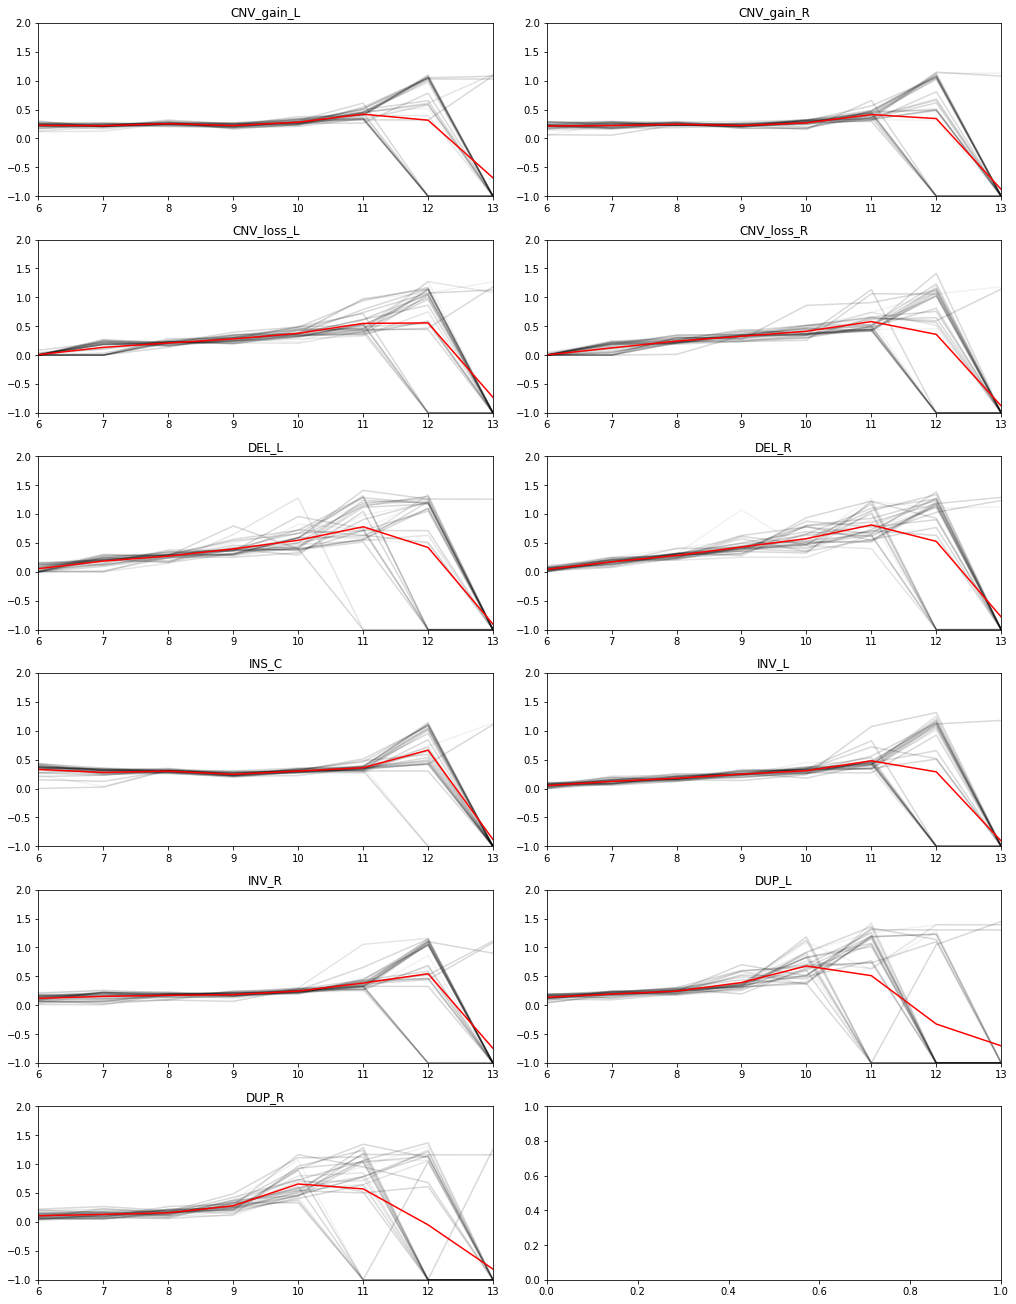

In [44]:
plots = []
for tp in ['CNV_gain', 'CNV_loss', 'DEL', 'INS', 'INV', 'DUP']:
    for s in ['L', 'R', 'C']:
        items = glob.glob(f'{root}ADA_TRM_*{tp}_{s}*s900*.json')
        if len(items) == 0: continue
        dtx = []
        for src in items:
            with open(src, 'r') as f:
                j = json.load(f)
                dtx.extend(j['repeats'])
        plots.append([dtx, f'{tp}_{s}'])
        
fig, axs = plt.subplots(6, 2, figsize=(2*7, 6*3), constrained_layout=True)
for ax, pdata in zip(axs.flat, plots):
    dtx, title = pdata
    ax.set_title(title)

    xx = [obj['threshold'] for obj in dtx[0]]
    yy = [[obj['dunn'][0] for obj in dti] for dti in dtx]

    for dti in dtx:
        ax.plot(xx, [obj['dunn'][0] for obj in dti], alpha=0.05, color="k")
        ax.set_xlim((6, 13))
        ax.set_ylim((-1, 2))
    ax.plot(xx, np.mean(yy, axis = 0), alpha=1, color="r")

---

In [82]:
dtx_one = plots[0][0][2]
[obj['dunn'] for obj in dtx_one]

[[0.17448896703900932, 1638, 389],
 [0.21521364693897124, 3115, 1071],
 [0.24184542347978907, 4627, 1896],
 [0.1815165480468802, 5789, 5664],
 [0.3052842866195785, 6516, 6471],
 [0.4932983261512485, 6924, 6911],
 [0.6536157997373107, 7127, 7123],
 [-1, 0, 0]]

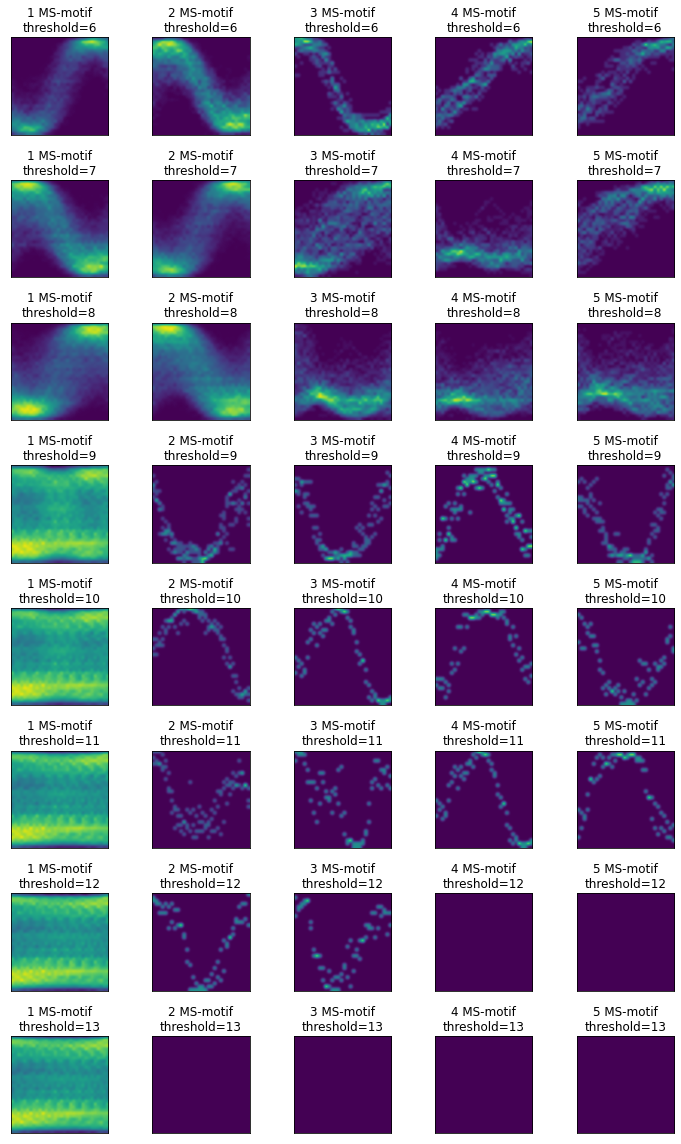

In [83]:
dtx_one = plots[0][0][2]
# dtx_one
fig, axs = plt.subplots(ncols=5, nrows=8, figsize=(10, 16),
                        subplot_kw={'xticks': [], 'yticks': []})
for y, line in enumerate(axs):
    for x, ax in enumerate(line):
        M = np.zeros((32,32))
        if len(dtx_one[y]['m']) > x:
            M = np.transpose(dtx_one[y]['m'][x])
        ax.imshow(M, origin="lower", interpolation='gaussian')
        ax.set_title(f'{x+1} MS-motif\nthreshold={y+6}')
plt.tight_layout()
plt.show()

---